# Featue Engineering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
data= pd.read_csv("eda_new.csv")
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,63000
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 

In [4]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,0.217152
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,0.254993
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.178728
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,0.018531
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.254569
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.183182
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.037607
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.052343
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.088334
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.019040


In [44]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy

array = data.values
# array
X = array[:,2:]
print(X)
Y = array[:,0]
y = Y

[[  1.98900000e+01   4.75966667e+01   1.92000000e+01 ...,   1.32754332e+01
    1.32754332e+01   6.12000000e+04]
 [  1.98900000e+01   4.66933333e+01   1.92000000e+01 ...,   1.86061950e+01
    1.86061950e+01   6.18000000e+04]
 [  1.98900000e+01   4.63000000e+01   1.92000000e+01 ...,   2.86426682e+01
    2.86426682e+01   6.24000000e+04]
 ..., 
 [  2.55000000e+01   4.65966667e+01   2.56285714e+01 ...,   2.91991171e+01
    2.91991171e+01   6.36000000e+04]
 [  2.55000000e+01   4.69900000e+01   2.54140000e+01 ...,   6.32278365e+00
    6.32278365e+00   6.42000000e+04]
 [  2.55000000e+01   4.66000000e+01   2.52642857e+01 ...,   3.41188506e+01
    3.41188506e+01   6.48000000e+04]]


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.03200396  0.03789936  0.03618889  0.03852859  0.03284491  0.03642076
  0.03378045  0.03684832  0.03230148  0.03844836  0.03905591  0.03834195
  0.02988122  0.03812471  0.03820096  0.04132216  0.02608178  0.03912515
  0.03925411  0.0363356   0.03889483  0.0316792   0.02847362  0.03918186
  0.0397719   0.03977545  0.06123449]


In [ ]:
# feature extraction
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

In [42]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
#     print("in loop")
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.227072 (0.008815)
KNN: 0.188372 (0.005628)
CART: 0.258296 (0.009200)
NB: 0.116797 (0.005199)


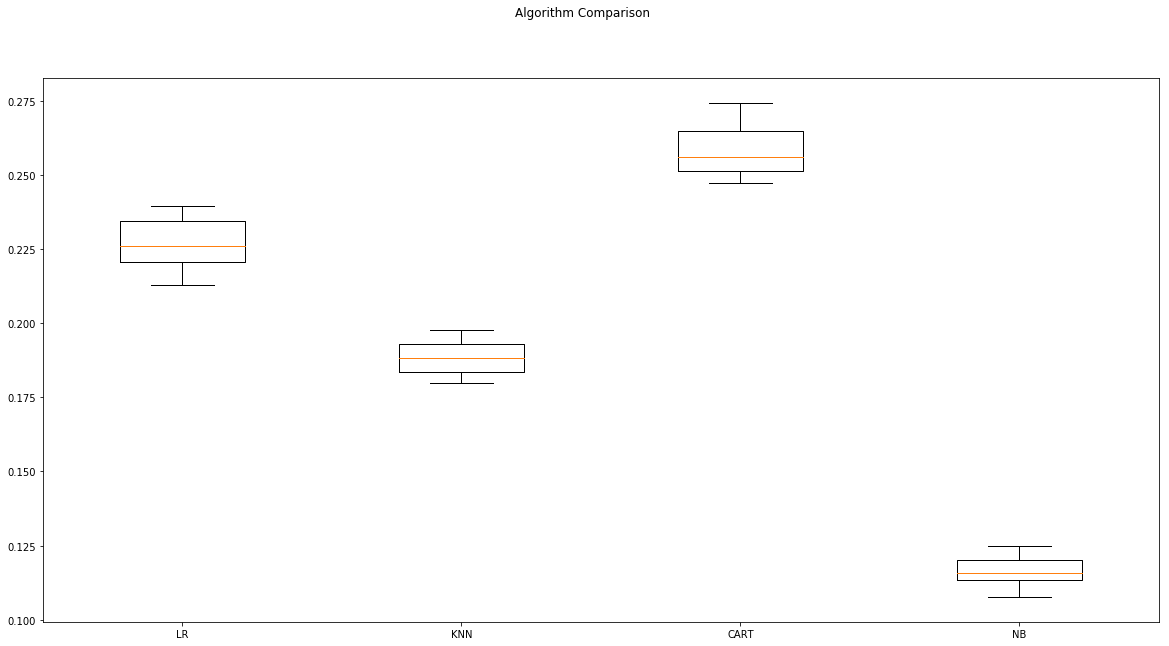

In [43]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
# y = y.ravel()
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
# X = pd.read_csv('examples/test_X.csv', index_col=0).values
# y = pd.read_csv('examples/test_y.csv', header=None, index_col=0).values
y = y.ravel()
print(y)
# # define random forest classifier, with utilising all cores and
# # sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=10)
# BorutaPy()
# # define Boruta feature selection method

# # call transform() on X to filter it down to selected features
# X_filtered = feat_selector.transform(X)

[  60.   60.   50. ...,  270.  420.  430.]


In [35]:
feat_selector = BorutaPy(rf, n_estimators="auto", perc=100, verbose=2)

In [36]:
feat_selector.fit(X, y)

Iteration: 	1 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 1000
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 1000
Confirmed: 	0
Tentative: 	1
Rejected: 	26
Iteration: 	37 / 1000
Confirmed: 	1
Tentative: 	0
Rejected: 	26


BorutaPy finished running.

Iteration: 	38 / 1000
Confirmed: 	1
Tentative: 	0
Rejected: 	26


C:\Users\sreer\Anaconda3\envs\learn_python\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=14, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x000002EAB85A1E10>,
            verbose=0, warm_start=False),
     max_iter=1000, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x000002EAB85A1E10>,
     two_step=True, verbose=2)

In [37]:
feat_selector.n_features_ 

1

In [39]:
feat_selector.ranking_

array([ 8,  7, 11, 16,  1, 17, 12, 22, 12,  2,  6, 23, 17, 21,  8, 24, 15,
       24, 14, 10, 27, 20,  4, 19,  3,  5, 26])

In [1]:
X_filtered = feat_selector.transform(X)
X_filtered

NameError: name 'feat_selector' is not defined

In [13]:
pd.DataFrame(X_filtered)

,0
0,19.790000
1,19.790000
2,19.790000
3,19.790000
4,19.790000
5,19.790000
6,19.790000
7,19.730000
8,19.730000
9,19.790000


In [ ]:
array = data.values
# array
X = array[:,2:29]
Y = array[:,0]
y = Y